In [1]:
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization
import XSpect.XSpect_PostProcessing
import XSpect.XSpect_Diagnostics
import matplotlib.pyplot as plt

Text(0, 0.5, 'On-off')

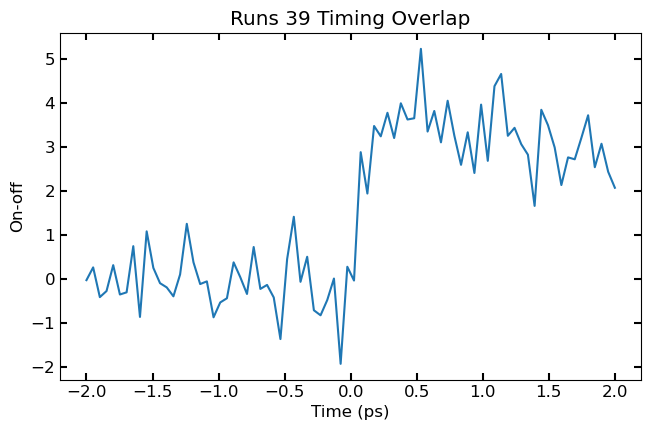

In [7]:

xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
xas=XSpect.XSpect_Controller.XASBatchAnalysis_1D_time()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
#xas.add_filter('xray','ipm',100.0)
#xas.add_filter('simultaneous','ipm',100.0)
#xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['67']) # 7.5 uJ -0.5 to 2 ps
xas.mintime = -2
xas.maxtime = 2
(xas.maxtime-xas.mintime)/0.05
xas.numpoints = int((xas.maxtime-xas.mintime)/0.05)
# xas.primary_analysis_parallel_loop(4,xas_experiment)
xas.primary_analysis_loop(xas_experiment)
for idx,run in enumerate(xas.analyzed_runs):
    if idx==0:
        on=run.epix_simultaneous_laser_time_binned/run.ipm_simultaneous_laser_time_binned
        off=run.epix_xray_not_laser_time_binned/run.ipm_xray_not_laser_time_binned
    else:
        on=on+run.epix_simultaneous_laser_time_binned/run.ipm_simultaneous_laser_time_binned
        off=off+run.epix_xray_not_laser_time_binned/run.ipm_xray_not_laser_time_binned
#on=xas.analyzed_runs[0].epix_simultaneous_laser_time_binned/xas.analyzed_runs[0].ipm_simultaneous_laser_time_binned
#off=xas.analyzed_runs[0].epix_xray_not_laser_time_binned/xas.analyzed_runs[0].ipm_xray_not_laser_time_binned
diff=on-off
plt.plot(xas.time_bins,on-off)
plt.title('Runs 39 Timing Overlap')
plt.xlabel('Time (ps)')
plt.ylabel('On-off')

In [14]:
xas.analyzed_runs[0].status

['New analysis of run 64 located in: /sdf/data/lcls/ds/xcs/xcsx1008722/hdf5/smalldata/xcsx1008722_Run0064.h5',
 'Obtained shot properties',
 'HDF5 import of keys completed. Time: 0.00 seconds',
 'Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser',
 'Shots (24230) separated for detector epix on filters: xray and laser into epix_xray_laser',
 'Shots combined for detector ipm on filters: simultaneous and laser into ipm_simultaneous_laser',
 'Shots (24230) separated for detector ipm on filters: xray and laser into ipm_xray_laser',
 'Generated timing bins from -3.000000 to 3.000000 in 120 steps.',
 'Shots combined for detector timing_bin_indices on filters: simultaneous and laser into timing_bin_indices_simultaneous_laser',
 'Shots (24230) separated for detector timing_bin_indices on filters: xray and laser into timing_bin_indices_xray_laser',
 'Detector epix_simultaneous_laser binned in time into key: epix_simultaneous_laser_time_binned',
 'De

In [16]:
xas.time_bins

array([-3.        , -2.94957983, -2.89915966, -2.8487395 , -2.79831933,
       -2.74789916, -2.69747899, -2.64705882, -2.59663866, -2.54621849,
       -2.49579832, -2.44537815, -2.39495798, -2.34453782, -2.29411765,
       -2.24369748, -2.19327731, -2.14285714, -2.09243697, -2.04201681,
       -1.99159664, -1.94117647, -1.8907563 , -1.84033613, -1.78991597,
       -1.7394958 , -1.68907563, -1.63865546, -1.58823529, -1.53781513,
       -1.48739496, -1.43697479, -1.38655462, -1.33613445, -1.28571429,
       -1.23529412, -1.18487395, -1.13445378, -1.08403361, -1.03361345,
       -0.98319328, -0.93277311, -0.88235294, -0.83193277, -0.78151261,
       -0.73109244, -0.68067227, -0.6302521 , -0.57983193, -0.52941176,
       -0.4789916 , -0.42857143, -0.37815126, -0.32773109, -0.27731092,
       -0.22689076, -0.17647059, -0.12605042, -0.07563025, -0.02521008,
        0.02521008,  0.07563025,  0.12605042,  0.17647059,  0.22689076,
        0.27731092,  0.32773109,  0.37815126,  0.42857143,  0.47

Obtained shot properties
HDF5 import of keys completed. Time: 0.00 seconds
Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser
Shots (3589) separated for detector epix on filters: xray and laser into epix_xray_laser
Shots combined for detector ipm on filters: simultaneous and laser into ipm_simultaneous_laser
Shots (3589) separated for detector ipm on filters: xray and laser into ipm_xray_laser
Shots combined for detector scan on filters: simultaneous and laser into scan_simultaneous_laser
Shots (3589) separated for detector scan on filters: xray and laser into scan_xray_laser
Shots combined for detector scanvar_indices on filters: simultaneous and laser into scanvar_indices_simultaneous_laser
Shots (3589) separated for detector scanvar_indices on filters: xray and laser into scanvar_indices_xray_laser
Detector epix_simultaneous_laser binned in energy into key: epix_simultaneous_laser_energy_binned
Detector epix_xray_not_laser binned in ener

/lscratch/lbgee/tmp/ipykernel_1943896/1624933971.py:19: RuntimeWarning: invalid value encountered in divide
  ons=laser_on/norm_on
/lscratch/lbgee/tmp/ipykernel_1943896/1624933971.py:20: RuntimeWarning: invalid value encountered in divide
  offs=laser_off/norm_off
/lscratch/lbgee/tmp/ipykernel_1943896/1624933971.py:21: RuntimeWarning: invalid value encountered in divide
  plt.plot(f.scanvar_bins,laser_on/norm_on)
/lscratch/lbgee/tmp/ipykernel_1943896/1624933971.py:22: RuntimeWarning: invalid value encountered in divide
  plt.plot(f.scanvar_bins,laser_off/norm_off)


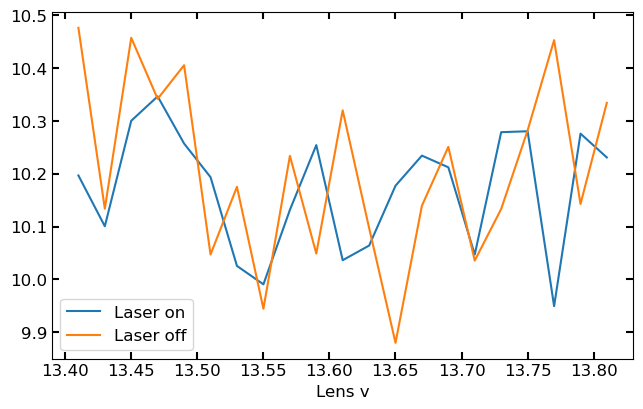

In [4]:
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=22, hutch='xcs', experiment_id='xcsx1008722')
f=XSpect.XSpect_Analysis.spectroscopy_run(xas_experiment,run=17,verbose=True)
xas=XSpect.XSpect_Controller.ScanAnalysis_1D()
analysis=XSpect.XSpect_Analysis.XASAnalysis()
keys=['epics/ccm_E','epicsUser/ccm_E_setpoint','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm5/sum','tt/AMPL','epix_2/ROI_0_sum','scan/var0'] 
names=['ccm','ccm_E_setpoint','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix','scan']
xas.set_key_aliases(keys,names)
#xas.
#xas.add_filter('xray','ipm',500.0)
#xas.add_filter('simultaneous','ipm',500.0)
#xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['52']) # 7.5 uJ -0.5 to 2 ps
xas.primary_analysis_loop(xas_experiment)
for f in xas.analyzed_runs:
    laser_on=f.epix_simultaneous_laser_energy_binned
    laser_off=f.epix_xray_not_laser_energy_binned
    norm_on=f.ipm_simultaneous_laser_energy_binned
    norm_off=f.ipm_xray_not_laser_energy_binned
ons=laser_on/norm_on
offs=laser_off/norm_off
plt.plot(f.scanvar_bins,laser_on/norm_on)
plt.plot(f.scanvar_bins,laser_off/norm_off)
#plt.plot(f.scanvar_bins,ons-offs)

plt.xlabel('Lens v')
plt.legend(['Laser on','Laser off'])